### Index:  
1. About Haberman dataset    
    1.1 Objective  
    1.2 Number of points   
    1.3 Numer of features    
    1.4 Number of classes   
    1.5 Data-points per class       
2. Univariate Analysis   
    2.1 Basic summary statistics     
    2.2 Histograms
    2.3 Probability Density Function (PDF)   
    2.4 Cumulative Distribution Function (CDF)   
    2.5 Box pLots    
    2.6 Violin plots   
3. Bi-variate analysis   
    3.1 Scatter plots   
    3.2 Pair plots   
4. Multi Variate analysis   
    4.1 Contour plots
5. Summary   
    

### Exploratory Data Analysis:  
EDA is a technique to understand the data set well, before actually proceeding to apply any machine learning algorithm. The process involves making visualizations and interepretations about which particular features have more impact on the target variable, fit a parsimonious model on the avaialable features. It is also common that we try to uncover any missing values, outliers or any other anamolies in the data set during the EDA process

### About Harberman Dataset:   
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
The data set consists of 4 features   
**1. Age -** Age of patient at time of operation (numerical)    
**2. Year -** Patient's year of operation (year - 1900, numerical)    
**3. Nodes -** Number of positive axillary nodes detected (numerical)    
**4. Survival status**      
        (class attribute) 1 = the patient survived 5 years or longer    
        (class attribute) 2 = the patient died within 5 year   

Reference: https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1

**Objective :**  
1. To classify the feature 'status' given other 3 features. In other words,try to fit a parsimonious model on the given data
2. Identify which feature has more impact on the target variable  
3. dentify any missing values, outliers in the data set

In [97]:
# importing necessary libraries
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [98]:
# Load the dataset
df = pd.read_csv('haberman.csv')

In [99]:
# print the first 6 rows
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [100]:
# data-points and features
print("Shape of the data set is:" , df.shape)

Shape of the data set is: (306, 4)


In [101]:
# Column names
print("The column names in the data set are:", df.columns)  

The column names in the data set are: Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [102]:
# Data points for each class attribute of the feature 'status' 
print(df['status'].value_counts())

1    225
2     81
Name: status, dtype: int64


In [103]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


**Obseration:**  
1. The data set has 4 features and 306 data points and there are no missing values for any of the features
2. The column names/features are - Age, year, Nodes, Status  
3. The feature 'status' has 2 classes - 1 , 2  with a count of 225 and 81 respectively   
4. Since there is a considerable difference between the counts of 2 classes the data set is not a balanced dataset  
5. The targert feature classe labels '1' and '2' can be mapped to 'yes' and 'no'


### Univariate Analysis:  


In [104]:
# Print the summary statistics of the data frame
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [105]:
# the unique values in the age
df['age'].unique()

array([30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 83],
      dtype=int64)

In [106]:
# the years considered
df['year'].unique()

array([64, 62, 65, 59, 58, 60, 66, 61, 67, 63, 69, 68], dtype=int64)

**Observation:**  
1. The feature 'nodes' ranges from 0 to 52   
2. The 'age' of all these patients range from 30 to 83 years  
3. The observation belong to a duration of 12 'year'   

### Histograms, PDF and CDF

**Histograms:**    
Show the number of points in a particular window   
**Probability Density Function:**   
A curve formed by smoothening the histogram using the kernel density function    
**Cummulative Density Function:**  
A curve formed 

In [107]:
# histograms of all the features
df_survived = df.loc[df['status'] == 1]
df_died = df.loc[df['status'] == 2]

# mapping the target class labels to yes and no, instead of 1 and 2
df['status'] = df['status'].map({1:'yes', 2: 'no'})

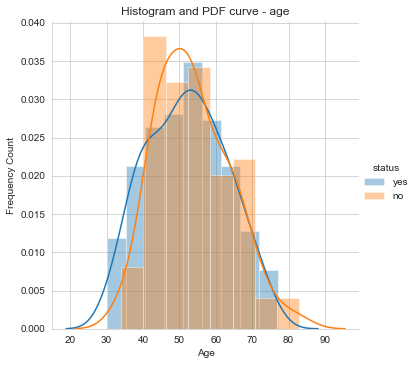

In [108]:
sns.FacetGrid(df, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("Histogram and PDF curve - age")
plt.xlabel("Age")
plt.ylabel("Frequency Count")
plt.show();

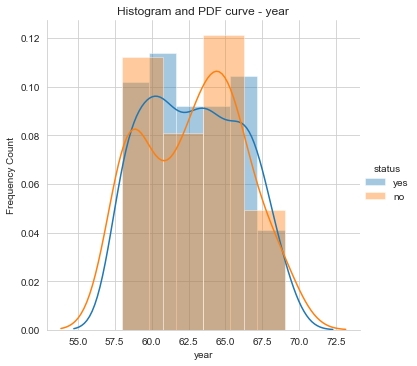

In [109]:
sns.FacetGrid(df, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("Histogram and PDF curve - year")
plt.xlabel("year")
plt.ylabel("Frequency Count")
plt.show();

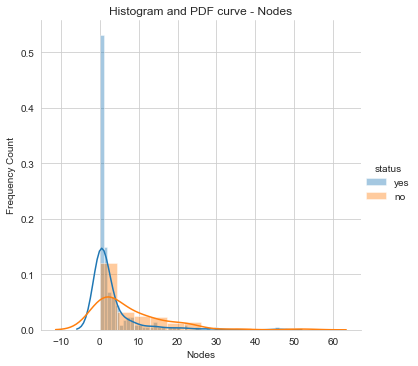

In [110]:
sns.FacetGrid(df, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("Histogram and PDF curve - Nodes")
plt.xlabel("Nodes")
plt.ylabel("Frequency Count")
plt.show();

**Observations:**  
1. The plot shows a huge overlap of the status 'yes' and 'no'. Hence it can be interpreted as the chance of survival is not  completely depending on the person's age.    
2. Similarly for the feaure 'year' also there is a considerable overlap of the curves. This also implies that the chance of survival didnot depend on the year. But there is a spike in deaths in the years 1960 and 1965.   
3. The survival status shows some dependence on the number of nodes here. The chance of survival is more if the patient has 0 or 1 node. But the chances of death are very high if the patient is having more than 25 nodes   

### PDF and CDF

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


Text(0, 0.5, 'Frequency')

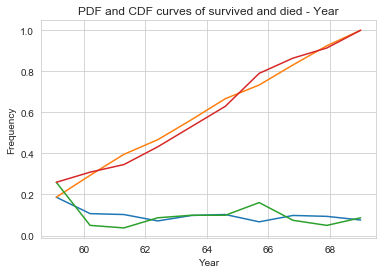

In [111]:
# Plots of CDF of years for different classes of status.

# survived
counts, bin_edges = np.histogram(df_survived['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

# died
counts, bin_edges = np.histogram(df_died['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title("PDF and CDF curves of survived and died - Year")
plt.xlabel("Year")
plt.ylabel("Frequency")

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


Text(0, 0.5, 'Frequency')

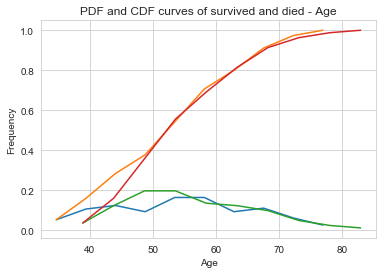

In [112]:
# Plots of CDF of age for different classes of status.

# survived
counts, bin_edges = np.histogram(df_survived['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

# died
counts, bin_edges = np.histogram(df_died['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("PDF and CDF curves of survived and died - Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


Text(0, 0.5, 'Frequency')

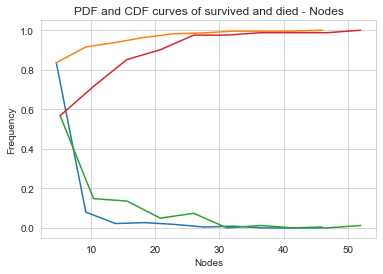

In [113]:
# Plots of CDF of nodes for different classes of status.

# survived
counts, bin_edges = np.histogram(df_survived['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

# died
counts, bin_edges = np.histogram(df_died['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title("PDF and CDF curves of survived and died - Nodes")
plt.xlabel("Nodes")
plt.ylabel("Frequency")

**Observation:**  
1. By looking at any of the above PDF curves it is very difficult to build a simple if else model, since there is considerable overlap of the curves  
2. Similar is the condition with the CDF curves.
3. It is also very difficult to identify one specific feature which can help us to predict the status   
4. But from the above plot we can interpret that more than 80% of patients have survived if they nodes in the range of 0-5.    


### Box Plots

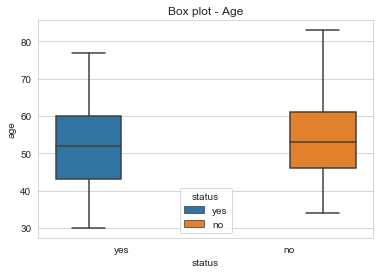

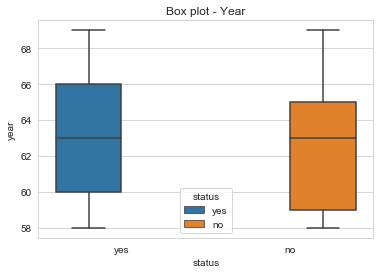

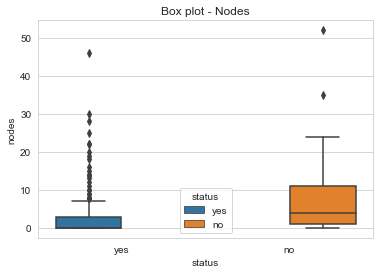

In [114]:
# box plots for age and status
sns.boxplot(x='status',y='age', data=df, hue = "status")
plt.title("Box plot - Age")
plt.show()

# box plots for years and status
sns.boxplot(x='status',y='year', data=df, hue = "status")
plt.title("Box plot - Year")
plt.show()

# box plots for nodes and status
sns.boxplot(x='status',y='nodes', data=df, hue = "status")
plt.title("Box plot - Nodes")
plt.show()

**Observations:** 
1. When we observer a box plot of status and nodes, there are considerable numbers of points outside the whiskers. These points can be considerd as outliers   

### Violin Plots

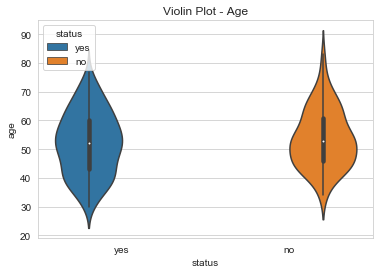

In [115]:
sns.violinplot(x="status", y="age", data=df, size=8, hue = "status")
plt.title("Violin Plot - Age")
plt.show()

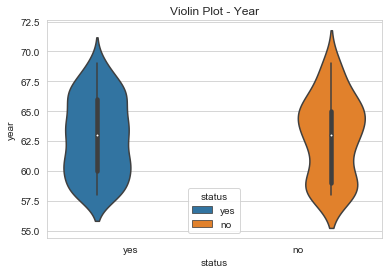

In [116]:
sns.violinplot(x="status", y="year", data=df, size=8, hue = "status")
plt.title("Violin Plot - Year")
plt.show()

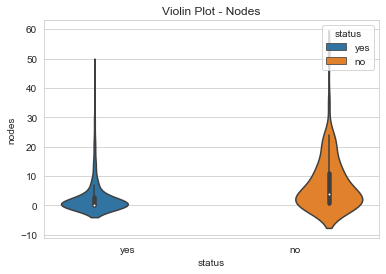

In [117]:
sns.violinplot(x="status", y="nodes", data=df, size=8, hue = "status")
plt.title("Violin Plot - Nodes")
plt.show()

### Bivariate Analysis

**Scatter plots:**  

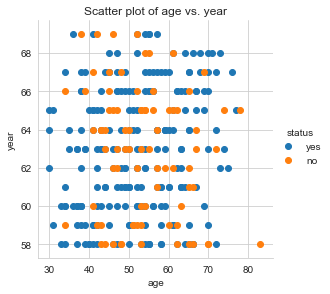

In [118]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", height=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.title("Scatter plot of age vs. year")
plt.show();

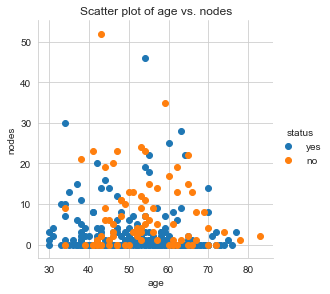

In [119]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", height=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title("Scatter plot of age vs. nodes")
plt.show();

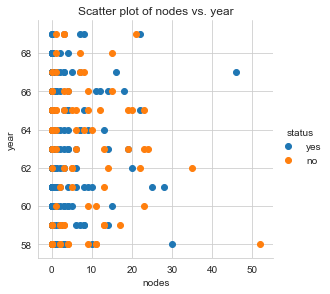

In [120]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", height=4) \
   .map(plt.scatter, "nodes", "year") \
   .add_legend();
plt.title("Scatter plot of nodes vs. year")
plt.show();

**Observations:**  
1. None of the features can distinctly explain the status of the patients, since there is considerable overlap of these scatter points   
2. There are very few patients who have more than 25 nodes   
3. Again patients with 0 or 1 node have more chances of survival  


**pair plots:**

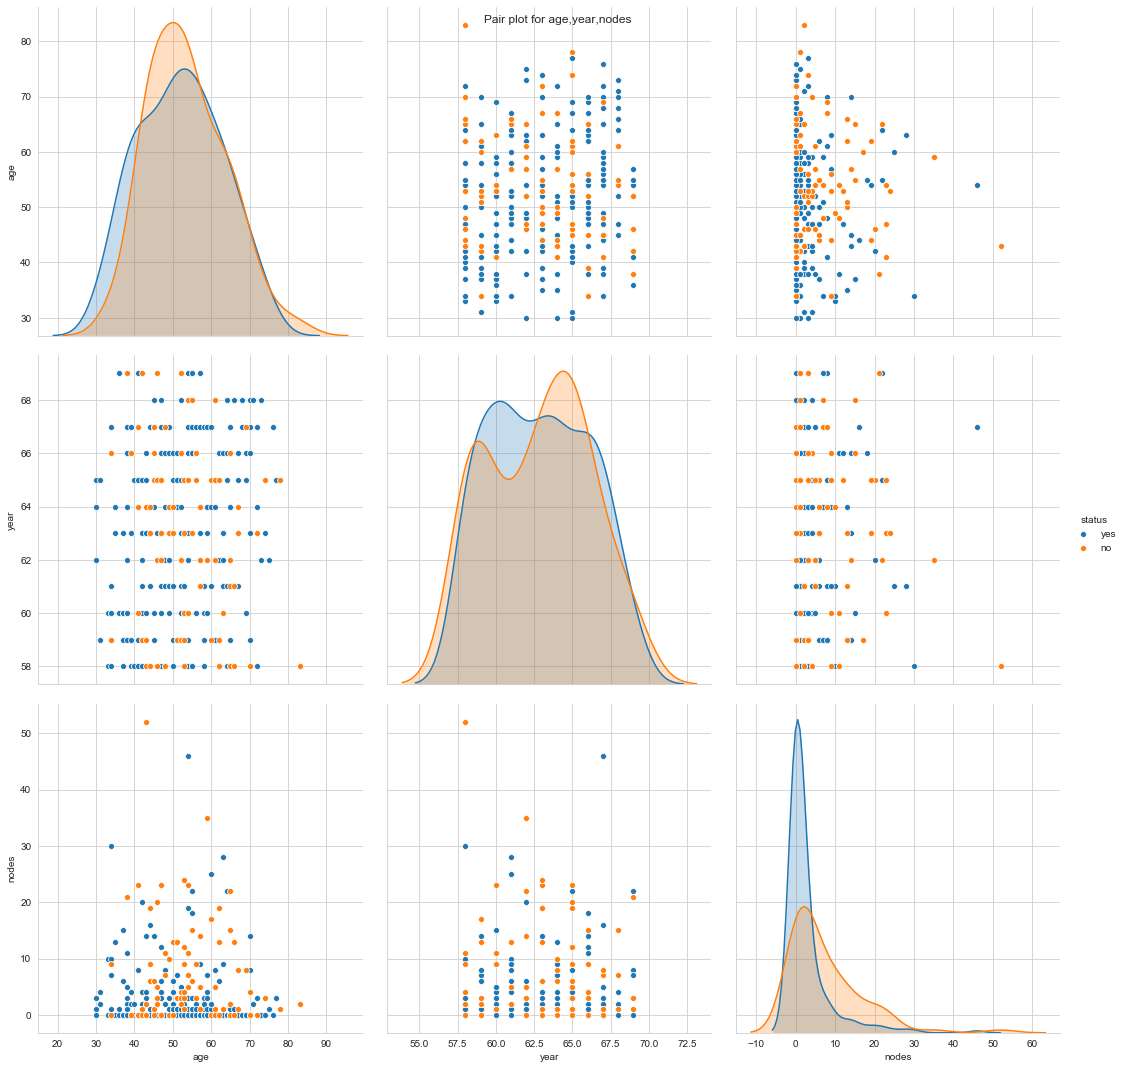

In [121]:
# pair plot
sns.set_style("whitegrid");
sns.pairplot(df,hue = 'status', height = 5)
plt.suptitle("Pair plot for age,year,nodes")
plt.show()

**Observation:**   
1. In any of the above scatter plots the points are not linearly separable
2. The points on the scatter plot over lap considerably, hence concluding the status using a simple if else condition is difficult

### Multivariate analysis:   
**Contour plot:**  

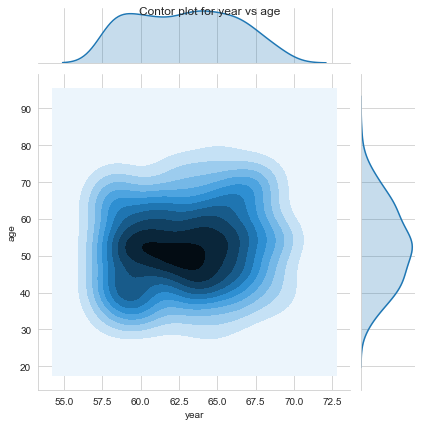

In [124]:
#2D Density plot, contors-plot
sns.jointplot(x="year", y="age", data=df, kind="kde");
plt.suptitle("Contor plot for year vs age")
plt.show();

### Summary:  
1. Patients with nodes 0 or 1 have more chances of survival. Patients with more than 25 nodes have very less chances of survival   
2. There are more number of deaths during the years 1960 and 1965   
3. Features 'age' and 'year' alone didnot help to draw conclusions on the status   